<h1 style="text-align: center;"><b>Neural Network for Faces Classification</b></h1>

–í —ç—Ç–æ–º –±–ª–æ–∫–Ω–æ—Ç–µ –º—ã –¥–æ–æ–±—É—á–∏–º `Inception Resnet V1` –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ª–∏—Ü–∞ –∏–∑ `CelebA dataset`, –∏–º–ø–ª–µ–º–µ–Ω—Ç–∏—Ä—É–µ–º `TPR@FPR` –º–µ—Ç—Ä–∏–∫—É, –æ—Ü–µ–Ω–∏–º –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è –º–æ–¥–µ–ª–∏.

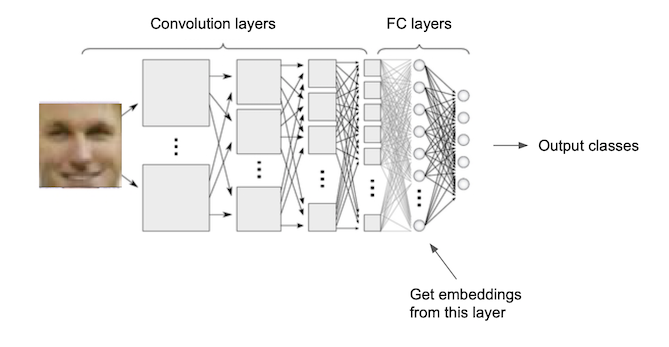



---
<a id='visual_distributions'></a>
## –°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ

- [‚öí –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ–∫—Ä—É–∂–µ–Ω–∏—è](#environment)

- [üìö –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö](#data)

    - [üíæ –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö](#download)

    - [üñº –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π](#visuaL)

    - [‚õì Dataset & Dataloader](#dataloader)

- [‚öô –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏](#build_train)

    - [üèé Inception Resnet V1](#inception)

    - [üß† –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏](#train)
    
- [üìä Cosine Similarity Distribution](#csd)

    - [üî¢ Matrix of Cosine Similarity](#mcs)
    
- [ üìà Identification Rate Metric](#irm)

<a id='environment'></a>
## ‚öí –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ–∫—Ä—É–∂–µ–Ω–∏—è
–ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import pandas as pd
import random
import copy
from tqdm import tqdm
import torchsummary
import os
import pickle
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform

import torch
import torchvision.transforms as transforms
from torchvision.transforms import functional
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch import nn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
def set_seed(seed):
    """–£—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –∑–µ—Ä–Ω–æ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–≤ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª"""

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)


def seed_worker(worker_id):
    """–í–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å DataLoader'a (—Å–º. —Å—Å—ã–ª–∫—É –≤—ã—à–µ)"""

    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


set_seed(42)

–í—ã—á–∏—Å–ª–µ–Ω–∏—è –±—É–¥–µ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å –Ω–∞ GPU

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()
print(DEVICE)
!nvidia-smi

cuda
Sun Jan 30 17:50:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    33W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+--

–î–∞–ª–µ–µ –±—É–¥–µ–º —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –ª—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ Google –î–∏—Å–∫

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
DIR = '/content/gdrive/MyDrive/faceRec'

<a id='data'></a>
## üìö –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –≤–æ–∑—å–º–µ–º —á–∞—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–∞ [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). –î–∞–ª–µ–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ–≥–æ –≤–µ—Ä—Å–∏—é, –≤ –∫–æ—Ç–æ—Ä–æ–π –≤—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤—ã—Ä–æ–≤–Ω–µ–Ω—ã –∏ –æ–±—Ä–µ–∑–∞–Ω—ã. –≠—Ç–æ—Ç –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å –ø–æ [—Å—Å—ã–ª–∫–µ](https://disk.yandex.ru/d/FVFucEDrZaxI9g).

<a id='download'></a>
### üíæ –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
# –≠—Ç–∞ —Å—Å—ã–ª–∫–∞ –Ω–µ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –¥–ª—è –≤–∞—Å. –ï—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–±–æ—á—É—é —Å—Å—ã–ª–∫—É,
# –ø–æ—Å–µ—Ç–∏—Ç–µ https://askubuntu.com/questions/1188381/how-to-get-link-of-file-to-download-with-wget
# –∏–ª–∏ —Å–∫–∞—á–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ–º–µ—Å—Ç–∏—Ç–µ –∏—Ö –≤ –ø–∞–ø–∫—É –≤—Ä—É—á–Ω—É—é
! wget "https://s765sas.storage.yandex.net/rdisk/36f14fddc3de6a8bf0547d156945b443c4d91b56eaa1f9225ce7469cb05777fd/61f6ef19/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=0&filename=celebA_train_1k.zip&disposition=attachment&hash=PfmOewm6R2ULQcsn/YzTYJAc1RAPeCDt%2Bp28Gx92u6wDzG5HjZYUVPYC93xmi%2BwEq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&rtoken=oA9av8C6PiZ0&force_default=no&ycrid=na-f861054831487eac56eacecc0e1b84a9-downloader1f&ts=5d6d229d73840&s=ab22fd5733f0c40a883af7e333ba09ba19ab6e085c310ef3bee3c256ac54fba6&pb=U2FsdGVkX1-WeajwXBWHSV3TFryOHZ-4pDM-GnBexDcehhC8AXnz55Lf6JjyH4uyah2ABM9k8St5e9GMCwvn0t1QAwPaqhGDIJdNFIMqk40" - O celebA.zip
! unzip -q celebA.zip

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ:

In [ ]:
! ls celebA_train_1k/

celebA_anno.txt  celebA_imgs  celebA_train_split.txt


- celebA_imgs ‚Äî –ø–∞–ø–∫–∞ —Å –≤—ã—Ä–æ–≤–Ω–µ–Ω–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ 
- celebA_anno.txt ‚Äî —Ñ–∞–π–ª —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏: –∫–∞–∫–æ–º—É —á–µ–ª–æ–≤–µ–∫—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∫–∞–∂–¥–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
- celebA_train_split.txt ‚Äî —Ñ–∞–π–ª —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ train/val/test

<a id='visuaL'></a>
### üñº –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

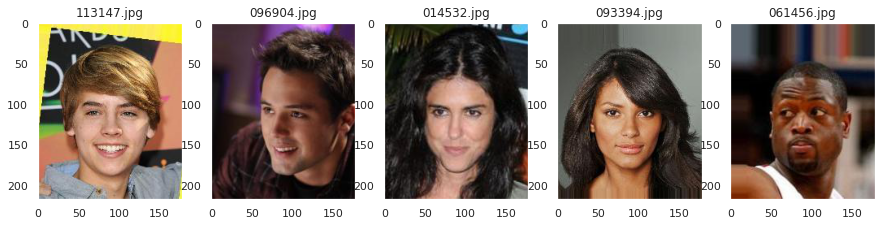

In [ ]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
        img = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', img))
        imgs.append(np.array(img))

    f, axes = plt.subplots(1, len(imgs), figsize=(3*len(imgs), 5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i])
        axes[i].set_title(images_names[i])
        axes[i].grid(None)
    plt.show()


images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]
show_imgs(images_names)

<a id='dataloader'></a>
### ‚õì Dataset & Dataloader

In [ ]:
def get_paths(dataset_type='train'):
    '''
    —Ñ—É–Ω–∫—Ü–∏—è, –≤–æ–∑–≤—Ä–∞—â–∞—é—â–∞—è —Å–ø–∏—Å–æ–∫ –ø—É—Ç–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ç–∏–ø–∞ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
    –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
      dataset_type: –æ–¥–Ω–æ –∏–∑ 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:
        images_paths.append(os.path.join(
            'celebA_train_1k/celebA_imgs/', filename))

    return np.array(images_paths)

–°–æ–∑–¥–∞–¥–∏–º Dataset'—ã

In [ ]:
class celebADataset(Dataset):

    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()

        labels = [x.strip().split() for x in labels]
        labels = {x: int(y) for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]

        image = Image.open(img_name)

        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }

        sample['image'] = self.transform(sample['image'])

        return sample

In [ ]:
class FaceTransform:

    def __init__(self, im_size=0, y_frame=65, x_frame=35):
        self.im_size = im_size
        self.y_frame = y_frame
        self.x_frame = x_frame

    def __call__(self, x):
        # input size: 218 x 178
        im_size = self.im_size
        y_frame = self.y_frame
        x_frame = self.x_frame

        img = functional.crop(
            x, y_frame, x_frame, int(218-1.52*y_frame), 178-2*x_frame)
        if im_size:
            img = functional.resize(img, im_size)
        img = functional.to_tensor(img)
        img = functional.normalize(
            img, (0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

        return img


transform = FaceTransform()

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

–°–æ–∑–¥–∞–¥–∏–º Dataloader'—ã

In [ ]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


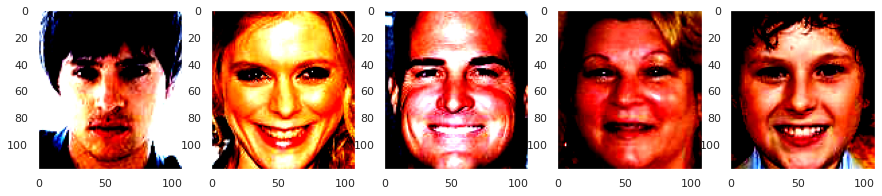

In [ ]:
num_img = 5
trans_img = np.rollaxis(next(iter(train_loader))[
                        'image'].numpy(), 1, 4)[:num_img]

f, axes = plt.subplots(1, 5, figsize=(3*5, 5))
for i, axis in enumerate(axes):
    axes[i].imshow(trans_img[i])
    axes[i].grid(None)
plt.show()

<a id='build_train'></a>
## ‚öô –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

<a id='inception'></a>
### üèé Inception Resnet V1
–î–∞–ª–µ–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –Ω–∞ VGGFace2 —Å–µ—Ç—å InceptionResnetV1: https://github.com/timesler/facenet-pytorch/tree/master/models

In [ ]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [ ]:
! ls models

inception_resnet_v1.py	mtcnn.py  utils


In [ ]:
from models import inception_resnet_v1

In [ ]:
model = inception_resnet_v1.InceptionResnetV1(
    pretrained='vggface2',
    classify=True, num_classes=1000
).to(DEVICE)

In [ ]:
torchsummary.summary(model, input_size=(3, 119, 108))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 43, 43]             864
       BatchNorm2d-2           [-1, 32, 43, 43]              64
              ReLU-3           [-1, 32, 43, 43]               0
       BasicConv2d-4           [-1, 32, 43, 43]               0
            Conv2d-5           [-1, 32, 41, 41]           9,216
       BatchNorm2d-6           [-1, 32, 41, 41]              64
              ReLU-7           [-1, 32, 41, 41]               0
       BasicConv2d-8           [-1, 32, 41, 41]               0
            Conv2d-9           [-1, 64, 41, 41]          18,432
      BatchNorm2d-10           [-1, 64, 41, 41]             128
             ReLU-11           [-1, 64, 41, 41]               0
      BasicConv2d-12           [-1, 64, 41, 41]               0
        MaxPool2d-13           [-1, 64, 20, 20]               0
           Conv2d-14           [-1, 80,

In [ ]:
child_counter = 0
for child in model.children():
    print(" child", child_counter, "is:")
    print(child)
    child_counter += 1

 child 0 is:
BasicConv2d(
  (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
 child 1 is:
BasicConv2d(
  (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
 child 2 is:
BasicConv2d(
  (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
 child 3 is:
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
 child 4 is:
BasicConv2d(
  (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)
 child 5 is:
BasicConv2d(
  (conv): Conv2d(80, 192, kernel_size=(3, 3), strid

<a id='train'></a>
### üß† –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–¢–µ–ø–µ—Ä—å –º—ã –±—É–¥–µ–º —Ñ–∞–π–Ω—Ç—é–Ω–∏—Ç—å —ç—Ç—É —Å–µ—Ç—å. –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º Feature Extractor. –ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å —Ç–æ–ª—å–∫–æ FC-—á–∞—Å—Ç—å

In [ ]:
for i, child in enumerate(model.children()):
    if i not in [14, 15, 16, 17]:
        for param in child.parameters():
            param.requires_grad = False

–§—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0

    for batch in train_loader:
        inputs = batch['image'].to(DEVICE)
        labels = batch['label'].to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data

    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for batch in val_loader:
        inputs = batch['image'].to(DEVICE)
        labels = batch['label'].to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size

    return val_loss, val_acc

In [ ]:
def train(train_loader, val_loader, model, epochs,
          optimizer, scheduler, criterion):

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(
                model, train_loader, criterion, optimizer)
            print("loss", train_loss)

            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            scheduler.step()
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,
                                           v_loss=val_loss, t_acc=train_acc,
                                           v_acc=val_acc))

    return history

In [ ]:
model = model.cuda()

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏ –ø–æ—Ç–µ—Ä—å –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å CE. –î–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å accuracy –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. 
–í –∫–∞—á–µ—Å—Ç–≤–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Adam, –≤ –∫–∞—á–µ—Å—Ç–≤–µ —à–µ–¥—É–ª–µ—Ä–∞ StepLR.

In [ ]:
epochs = 10
optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 3, 0.5)
criterion = nn.CrossEntropyLoss()

In [ ]:
history = train(train_loader, val_loader, model, epochs,
                optimizer, scheduler, criterion)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 7.081466393034732


epoch:  10%|‚ñà         | 1/10 [00:55<08:23, 55.98s/it]


Epoch 001 train_loss: 7.0815     val_loss 4.3448 train_acc 0.0007 val_acc 0.4826
loss 4.417187061929999


epoch:  20%|‚ñà‚ñà        | 2/10 [01:50<07:23, 55.40s/it]


Epoch 002 train_loss: 4.4172     val_loss 2.3624 train_acc 0.0691 val_acc 0.4727
loss 1.5104257652532291


epoch:  30%|‚ñà‚ñà‚ñà       | 3/10 [02:46<06:27, 55.29s/it]


Epoch 003 train_loss: 1.5104     val_loss 1.4818 train_acc 0.6548 val_acc 0.6876
loss 0.7059209006408041


epoch:  40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [03:41<05:30, 55.16s/it]


Epoch 004 train_loss: 0.7059     val_loss 0.4749 train_acc 0.8617 val_acc 0.9151
loss 0.29497786327793507


epoch:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [04:35<04:35, 55.05s/it]


Epoch 005 train_loss: 0.2950     val_loss 0.4450 train_acc 0.9540 val_acc 0.9194
loss 0.22808044507626407


epoch:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [05:30<03:39, 54.99s/it]


Epoch 006 train_loss: 0.2281     val_loss 0.4350 train_acc 0.9686 val_acc 0.9186
loss 0.16614975793625678


epoch:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [06:25<02:44, 54.95s/it]


Epoch 007 train_loss: 0.1661     val_loss 0.4276 train_acc 0.9783 val_acc 0.9194
loss 0.14649406102366958


epoch:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [07:20<01:49, 54.98s/it]


Epoch 008 train_loss: 0.1465     val_loss 0.4262 train_acc 0.9834 val_acc 0.9186
loss 0.13149869654232574


epoch:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [08:15<00:54, 54.93s/it]


Epoch 009 train_loss: 0.1315     val_loss 0.4268 train_acc 0.9860 val_acc 0.9197
loss 0.11125767237691782


epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [09:10<00:00, 55.05s/it]


Epoch 010 train_loss: 0.1113     val_loss 0.4265 train_acc 0.9887 val_acc 0.9189


In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

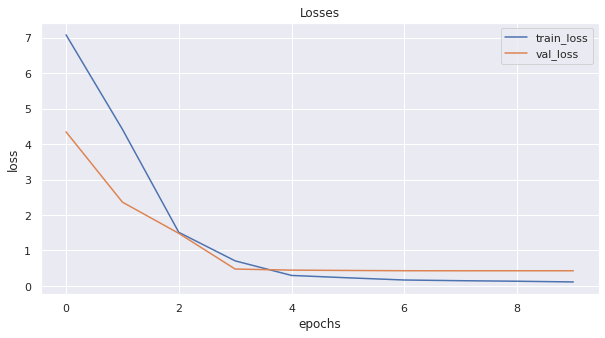

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.show()

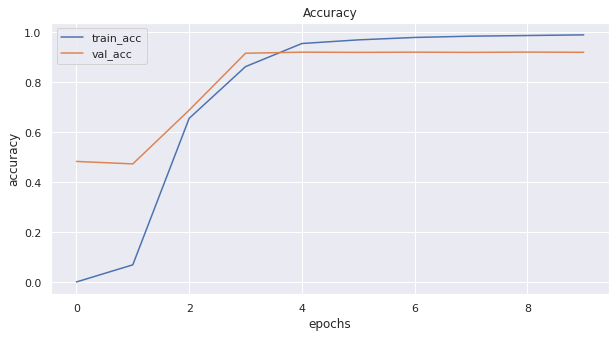

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.show()

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤–µ—Å–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏
model_weights = copy.deepcopy(model.state_dict())
torch.save(model_weights, DIR + '/model_weights.pth')

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏—Ç—å –≤–µ—Å–∞ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏
model.load_state_dict(torch.load(DIR + '/model_weights.pth'))

<All keys matched successfully>

In [ ]:
_, test_acc = eval_epoch(model, test_loader, criterion)
print(f'Test Accuracy: {test_acc:0.4f}')

Test Accuracy: 0.9093


–î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

<a id='csd'></a>
## üìä Cosine Similarity Distribution

–¢–µ–ø–µ—Ä—å —Å–¥–µ–ª–∞–µ–º —Å–ª–µ–¥—É—é—â–µ–µ: 

* –û—Ç–±—Ä–æ—Å–∏–º –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ª–æ–π –æ–±—É—á–µ–Ω–Ω–æ–π —Å–µ—Ç–∏.

* –ü–æ–ª—É—á–∏–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –¥–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞.

* –í—ã—á–∏—Å–ª–∏–º –≤—Å–µ –∫–æ—Å–∏–Ω—É—Å–Ω—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –æ–¥–Ω–æ–≥–æ –∏ —Ç–æ–≥–æ –∂–µ —á–µ–ª–æ–≤–µ–∫–∞ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –∏ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.

* –í—ã—á–∏—Å–ª–∏–º –∫–æ—Å–∏–Ω—É—Å–Ω—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –ø–∞—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ä–∞–∑–Ω—ã–º –ª—é–¥—è–º.

* –ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –ø–æ—Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ—Å–∏–Ω—É—Å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Ä–∞–∑–¥–µ–ª–∏–º—ã –ª–∏ –æ–Ω–∏?


In [ ]:
batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
model_for_emb = inception_resnet_v1.InceptionResnetV1(
    pretrained='vggface2',
    classify=True, num_classes=1000
).to(DEVICE).cuda()

model_for_emb.load_state_dict(torch.load(DIR + '/model_weights.pth'))

<All keys matched successfully>

In [ ]:
def get_embeddings(model, data_loader):
    model.eval()
    model.logits = nn.Identity()
    embeddings = {}

    for batch in data_loader:
        inputs = batch['image'].to(DEVICE)
        labels = batch['label'].to(DEVICE)
        with torch.no_grad():
            outputs = model(inputs)
        for label, vector in zip(labels, outputs):
            label = int(label)
            if label in embeddings:
                embeddings[label] = torch.cat((embeddings[label], vector))
            else:
                embeddings[label] = vector

    for label in embeddings.keys():
        embeddings[label] = embeddings[label].view(-1, 512)

    return embeddings

In [ ]:
train_embeddings = get_embeddings(model_for_emb, train_loader)
test_embeddings = get_embeddings(model_for_emb, test_loader)

In [ ]:
len(train_embeddings), len(test_embeddings)

(1000, 976)

In [ ]:
# –ó–∞–ø–∏—à–µ–º –≤–µ–∫—Ç–æ—Ä—ã –≤ —Å–ª–æ–≤–∞—Ä—å
with open(os.path.join(DIR, 'train_embeddings.pickle'), 'wb') as f:
    pickle.dump(train_embeddings, f)

with open(os.path.join(DIR, 'test_embeddings.pickle'), 'wb') as f:
    pickle.dump(test_embeddings, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º –≤–µ–∫—Ç–æ—Ä—ã
with open(os.path.join(DIR, 'train_embeddings.pickle'), 'rb') as f:
    train_embeddings = pickle.load(f)

with open(os.path.join(DIR, 'test_embeddings.pickle'), 'rb') as f:
    test_embeddings = pickle.load(f)

In [ ]:
positive_cos_train = torch.tensor(()).to(DEVICE)
for label in train_embeddings.keys():
    num_vec = train_embeddings[label].shape[0]
    if num_vec > 1:
        for i in range(num_vec):
            for j in range(num_vec):
                if j > i:
                    cos_sim = F.cosine_similarity(
                        train_embeddings[label][i],
                        train_embeddings[label][j],
                        dim=-1)
                    positive_cos_train = torch.hstack(
                        (positive_cos_train, cos_sim))

In [ ]:
positive_cos_test = torch.tensor(()).to(DEVICE)
for label in test_embeddings.keys():
    num_vec = test_embeddings[label].shape[0]
    if num_vec > 1:
        for i in range(num_vec):
            for j in range(num_vec):
                if j > i:
                    cos_sim = F.cosine_similarity(
                        test_embeddings[label][i],
                        test_embeddings[label][j],
                        dim=-1)
                    positive_cos_test = torch.hstack(
                        (positive_cos_test, cos_sim))

In [ ]:
k = 0
KMAX = 1e5
negative_cos_test = torch.tensor(()).to(DEVICE)

for label1 in test_embeddings.keys():
    num_vec1 = test_embeddings[label1].shape[0]

    for label2 in test_embeddings.keys():
        num_vec2 = test_embeddings[label2].shape[0]

        if (label1 < label2) and (k < KMAX):
            for i in range(num_vec1):
                for j in range(num_vec2):
                    cos_sim = F.cosine_similarity(
                        test_embeddings[label1][i],
                        test_embeddings[label2][j],
                        dim=-1)
                    negative_cos_test = torch.hstack(
                        (negative_cos_test, cos_sim))
                    k += 1

In [ ]:
k = 0
KMAX = 1e5
negative_cos_train = torch.tensor(()).to(DEVICE)

for label1 in train_embeddings.keys():
    num_vec1 = train_embeddings[label1].shape[0]

    for label2 in train_embeddings.keys():
        num_vec2 = train_embeddings[label2].shape[0]

        if (label1 < label2) and (k < KMAX):
            for i in range(num_vec1):
                for j in range(num_vec2):
                    cos_sim = F.cosine_similarity(
                        train_embeddings[label1][i],
                        train_embeddings[label2][j],
                        dim=-1)
                    negative_cos_train = torch.hstack(
                        (negative_cos_train, cos_sim))
                    k += 1

In [ ]:
# –ó–∞–ø–∏—à–µ–º –≤ —Å–ª–æ–≤–∞—Ä—å
with open(os.path.join(DIR, 'positive_cos_train.pickle'), 'wb') as f:
    pickle.dump(positive_cos_train, f)

with open(os.path.join(DIR, 'positive_cos_test.pickle'), 'wb') as f:
    pickle.dump(positive_cos_test, f)

with open(os.path.join(DIR, 'negative_cos_train.pickle'), 'wb') as f:
    pickle.dump(negative_cos_train, f)

with open(os.path.join(DIR, 'negative_cos_test.pickle'), 'wb') as f:
    pickle.dump(negative_cos_test, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º
with open(os.path.join(DIR, 'positive_cos_train.pickle'), 'rb') as f:
    positive_cos_train = pickle.load(f)

with open(os.path.join(DIR, 'positive_cos_test.pickle'), 'rb') as f:
    positive_cos_test = pickle.load(f)

with open(os.path.join(DIR, 'negative_cos_train.pickle'), 'rb') as f:
    negative_cos_train = pickle.load(f)

with open(os.path.join(DIR, 'negative_cos_test.pickle'), 'rb') as f:
    negative_cos_test = pickle.load(f)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


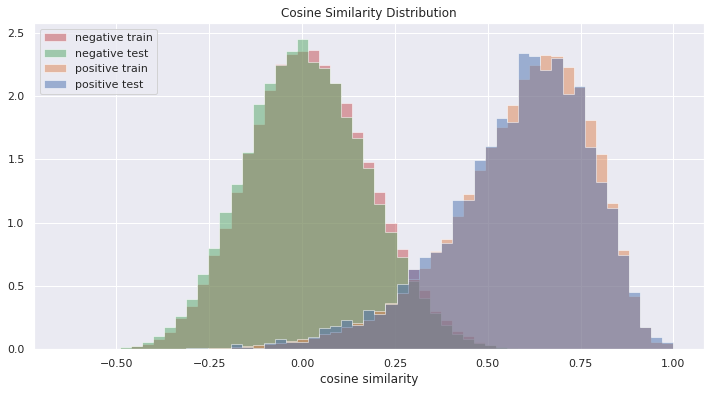

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist([
    positive_cos_test.cpu().numpy(),
    positive_cos_train.cpu().numpy(),
    negative_cos_test.cpu().numpy(),
    negative_cos_train.cpu().numpy(),
],
    bins=55, density=True, histtype='stepfilled', alpha=0.5,
    label=['positive test', 'positive train',
           'negative test', 'negative train'])
plt.legend(loc='upper left')
plt.xlabel("cosine similarity")
plt.title('Cosine Similarity Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


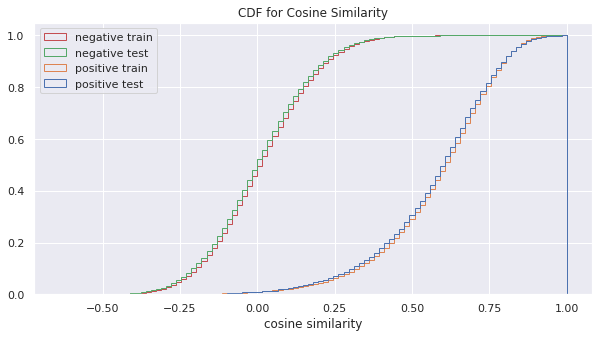

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist([
    positive_cos_test.cpu().numpy(),
    positive_cos_train.cpu().numpy(),
    negative_cos_test.cpu().numpy(),
    negative_cos_train.cpu().numpy(),
],
    bins=100, density=True, histtype='step', alpha=1,
    label=['positive test', 'positive train',
           'negative test', 'negative train'], cumulative=True,)
plt.legend(loc='upper left')
plt.xlabel("cosine similarity")
plt.title('CDF for Cosine Similarity')
plt.show()

–í–∏–¥–∏–º, —á—Ç–æ –º–æ–∂–Ω–æ –ø–æ–¥–æ–±—Ä–∞—Ç—å —Ç–∞–∫–æ–µ –ø–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —Å –Ω–µ–∫–æ—Ç–æ—Ä–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é –ø–æ–ª—É—á–∏–≤—à–∏–µ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±—É–¥—É—Ç —Ä–∞–∑–¥–µ–ª–∏–º—ã.

<a id='mcs'></a>
### üî¢ Matrix of Cosine Similarity

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Å–∏–Ω—É—Å–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –º–µ–∂–¥—É —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –ª—é–¥—å–º–∏ –≤ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ

In [ ]:
def get_mean_embeddings(embeddings):

    for label in embeddings.keys():
        embeddings[label] = embeddings[label].view(-1, 512).mean(dim=0)

    return embeddings

In [ ]:
train_mean_embeddings = get_mean_embeddings(train_embeddings)
test_mean_embeddings = get_mean_embeddings(test_embeddings)

In [ ]:
# –ó–∞–ø–∏—à–µ–º –≤–µ–∫—Ç–æ—Ä—ã –≤ —Å–ª–æ–≤–∞—Ä—å
with open(os.path.join(DIR, 'train_mean_embeddings.pickle'), 'wb') as f:
    pickle.dump(train_mean_embeddings, f)

with open(os.path.join(DIR, 'test_mean_embeddings.pickle'), 'wb') as f:
    pickle.dump(test_mean_embeddings, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º –≤–µ–∫—Ç–æ—Ä—ã
with open(os.path.join(DIR, 'train_mean_embeddings.pickle'), 'rb') as f:
    train_mean_embeddings = pickle.load(f)

with open(os.path.join(DIR, 'test_mean_embeddings.pickle'), 'rb') as f:
    test_mean_embeddings = pickle.load(f)

In [ ]:
overlap_keys = train_embeddings.keys() & test_embeddings.keys()

len(overlap_keys)

976

In [ ]:
new_train_emb = torch.tensor(()).to(DEVICE)
new_test_emb = torch.tensor(()).to(DEVICE)

for label in overlap_keys:
    new_train_emb = torch.cat((new_train_emb, train_embeddings[label]), dim=-1)
    new_test_emb = torch.cat((new_test_emb, test_embeddings[label]), dim=-1)

new_train_emb = new_train_emb.view(-1, 512)
new_test_emb = new_test_emb.view(-1, 512)

In [ ]:
cos_sim_matrix = cosine_similarity(new_train_emb.cpu(), new_test_emb.cpu())
cos_sim_matrix.shape

(976, 976)

In [ ]:
# –ó–∞–ø–∏—à–µ–º –º–∞—Ç—Ä–∏—Ü—É –≤ —Å–ª–æ–≤–∞—Ä—å
with open(os.path.join(DIR, 'cos_sim_matrix.pickle'), 'wb') as f:
    pickle.dump(cos_sim_matrix, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º –º–∞—Ç—Ä–∏—Ü—É
with open(os.path.join(DIR, 'cos_sim_matrix.pickle'), 'rb') as f:
    cos_sim_matrix = pickle.load(f)

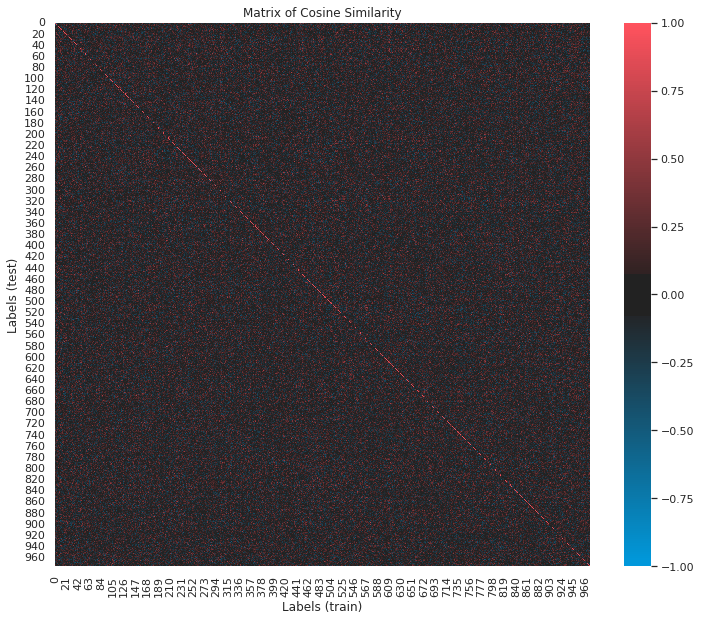

In [ ]:
my_p = sns.diverging_palette(240, 10, s=100, sep=20, l=60,
                             center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cos_sim_matrix, cmap=my_p, vmin=-1, vmax=1)
plt.xlabel("Labels (train)")
plt.ylabel("Labels (test)")
plt.title('Matrix of Cosine Similarity')
plt.show(fig)

<a id='irm'></a>
## üìà Identification Rate Metric
–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –≤—ã—à–µ –º—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ä—ã –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏. –û–¥–Ω–∞–∫–æ —É —ç—Ç–æ–≥–æ –º–µ—Ç–æ–¥–∞ –µ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫: –º—ã –Ω–µ –º–æ–∂–µ–º –∏–∑–º–µ—Ä–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö –µ–π –ª–∏—Ü–∞—Ö (–∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö).

–ß—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É, –º—ã –º–æ–∂–µ–º —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –¥—Ä—É–≥—É—é –º–µ—Ç—Ä–∏–∫—É –¥–ª—è –º–æ–¥–µ–ª–∏:  **identification rate**. –í–æ—Ç –∫–∞–∫ –æ–Ω–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç:

–£ –Ω–∞—Å –µ—Å—Ç—å –¥–≤–∞ –Ω–∞–±–æ—Ä–∞ –ª–∏—Ü: query –∏ distractors. –ù–∏ –æ–¥–Ω–æ –ª–∏—Ü–æ –∏–∑ —ç—Ç–∏—Ö –Ω–∞–±–æ—Ä–æ–≤ –Ω–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ –æ–±—É—á–∞—é—â–µ–º, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –∏–ª–∏ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–∞—Ö.

1. –í—ã—á–∏—Å–ª–∏—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ª–∏—Ü–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –æ–¥–Ω–∏–º –∏ —Ç–µ–º –∂–µ –ª—é–¥—è–º –∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö query. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –µ—Å–ª–∏ —É —á–µ–ª–æ–≤–µ–∫–∞ –µ—Å—Ç—å 3 —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ –≤ query: 01.jpg, 02.jpg, 03.jpg, —Ç–æ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è 3 –∫–æ—Å–∏–Ω—É—Å–Ω—ã—Ö —Å—Ö–æ–¥—Å—Ç–≤–∞ –º–µ–∂–¥—É –∫–∞–∂–¥–æ–π –ø–∞—Ä–æ–π —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —ç—Ç–∏–º —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è–º.

2. –í—ã—á–∏—Å–ª–∏—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ª–∏—Ü–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Ä–∞–∑–Ω—ã–º –ª—é–¥—è–º –∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö query.

3. –í—ã—á–∏—Å–ª–∏—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ø–∞—Ä–∞–º–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö query –∏ distractors. –¢–æ –µ—Å—Ç—å —Å—á–∏—Ç–∞–µ–º cosine similarity –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ (q, d), –≥–¥–µ q - —ç–±–º–µ–¥–¥–∏–Ω–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ª–∏—Ü—É –∏–∑ query, d - —ç–±–º–µ–¥–¥–∏–Ω–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ª–∏—Ü—É –∏–∑ distractors. –ú—ã –ø–æ–ª—É—á–∏–º —Å—Ö–æ–¥—Å—Ç–≤–æ |query|*|distractors|.

4. –°–∫–ª–∞–¥—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ö–æ–¥—Å—Ç–≤ –∏–∑ 2 –∏ 3 –ø—É–Ω–∫—Ç–æ–≤. –≠—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω—ã—Ö –ø–∞—Ä (false pairs).

5. –§–∏–∫—Å–∏—Ä—É–µ–º **FPR** (false positive rate, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ª–æ–∂–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π). –ü—É—Å—Ç—å –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –æ–Ω –±—É–¥–µ—Ç —Ä–∞–≤–µ–Ω 0.01. FPR, —É–º–Ω–æ–∂–µ–Ω–Ω–æ–µ –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω—ã—Ö –ø–∞—Ä –∏–∑ –ø—É–Ω–∫—Ç–∞ 4, - —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –¥–æ–ø—É—Å–∫–∞–µ–º –≤ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏. –ù–∞–∑–æ–≤–µ–º —ç—Ç–æ —á–∏—Å–ª–æ N

6. –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ similarity –ª–æ–∂–Ω—ã—Ö –ø–∞—Ä –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è. –ü–æ–ª—É—á–∏–º N-–π —ç–ª–µ–º–µ–Ω—Ç –æ—Ç –Ω–∞—á–∞–ª–∞ - —ç—Ç–æ –Ω–∞—à–µ –ø–æ—Ä–æ–≥–æ–≤–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ (**threshold similarity**).

7. –ü–æ–¥—Å—á–∏—Ç–∞–µ–º, —Å–∫–æ–ª—å–∫–æ positive similarities –∏–∑ –ø—É–Ω–∫—Ç–∞ 1 —Ä–∞–≤–Ω–æ –∏–ª–∏ –±–æ–ª—å—à–µ threshold similarity. –†–∞–∑–¥–µ–ª–∏–º —ç—Ç–æ —á–∏—Å–ª–æ –Ω–∞ —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ positive similarities –∏–∑ –ø—É–Ω–∫—Ç–∞ 1. –≠—Ç–æ –∏ –µ—Å—Ç—å TPR (true positive rate) - –Ω–∞—à–∞ –º–µ—Ç—Ä–∏–∫–∞.

–≠—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å—Å—è –∫–∞–∫ TPR@FPR=0.01. FPR –º–æ–∂–µ—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è.

–ù–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö (query —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏, –º–µ—Ç–∫–∏ query –∏ distructors —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏) –º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å –∑–¥–µ—Å—å: https://disk.yandex.ru/d/C54mClLmQkag6Q

In [ ]:
! wget "https://s339vla.storage.yandex.net/rdisk/840835033d0b307c9ddca355b61f0365a7d47ab7d5923aca91a407266135c757/61f7019f/aZ8Akc9CqtcaAMvg9MkExUS0nM-Qw6vBjH2cBgsvJt4L8iF-6XTumJI9B01yJilqrXxNRYEGr_S1T7X9_fQXiQ==?uid=0&filename=celebA_ir.zip&disposition=attachment&hash=MCgzRvhQiUJarz9o08OG/sEcpdPhcvZdM1R/Ra2e2NF0ybsUoL/BrSQw424Y62pLq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=75566735&hid=5e690094946e8e9da28436cde7a2724a&media_type=compressed&tknv=v2&rtoken=QVP0j4T0KxmF&force_default=no&ycrid=na-90b49bda1cbbe11a6f1aef588f396299-downloader20e&ts=5d6d3447c65c0&s=53a09bc18ecbc09f66f4138298a758f5eb9f16aa6d9936cb150e8de04e48812d&pb=U2FsdGVkX1_eBQv5zAHuIrD90R8355tl8t8oknIpn875b2am9rrnVX5-lriwWga5H4OpQHWGivQ6SpF1ZnlfhwLMannjEBh440Ml08ziy5M" - O celebA_ir.zip
! unzip celebA_ir.zip

In [ ]:
! ls celebA_ir/

celebA_anno_query.txt  celebA_distractors  celebA_query


In [ ]:
# —Ñ–∞–π–ª —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏ –∫ query —á–∞—Å—Ç–∏: –∫–∞–∫–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Å—É
# format:
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ query
query_img_names = [x[0] for x in query_lines]

# —Å–ª–æ–≤–∞—Ä—å —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ —Ç–æ–º, –∫–∞–∫–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ query –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Å—É
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
    query_dict[img_class].append(img_name)

# —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π distractor –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors')

–ó–∞–≥—Ä—É–∑–∏–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å

In [ ]:
model = inception_resnet_v1.InceptionResnetV1(
    pretrained='vggface2',
    classify=True, num_classes=1000
).to(DEVICE)

model.load_state_dict(torch.load(DIR + '/model_weights.pth'))

<All keys matched successfully>

In [ ]:
def compute_embeddings(model, images_list, dataset_type='query'):
    '''
    –≤—ã—á–∏—Å–ª–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏–∑ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è —Å–ø–∏—Å–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
    –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
        model: –æ–±—É—á–µ–Ω–Ω–∞—è nn, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –≤—ã–¥–∞–µ—Ç —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
        images_list: —Å–ø–∏—Å–æ–∫ –ø—É—Ç–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
    output:
        tensor: —Ç–µ–Ω–∑–æ—Ä –∏–∑ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –º–æ–¥–µ–ª–∏. –ö–∞–∂–¥–æ–º—É —ç–º–±–µ–¥–¥–∏–Ω–≥—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç 
                –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –∏–º–µ–Ω–∞–º–∏ –∏–∑ —Å–ø–∏—Å–∫–∞ images_list
    '''

    model_embed = model
    model_embed.logits = nn.Identity()
    model_embed.eval()
    embeddings = []

    resize = transforms.Resize((119, 108))

    dir = './celebA_ir/celebA_' + dataset_type + '/'
    for img_name in images_list:
        img = np.array(Image.open(os.path.join(dir, img_name)))
        input = resize(torch.FloatTensor(
            np.rollaxis(img, 2, 0))).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            output = model_embed(input)
        embeddings.append(output)

    return embeddings

In [ ]:
query_embeddings = compute_embeddings(model, query_img_names)
distractors_embeddings = compute_embeddings(
    model, distractors_img_names, 'distractors')

In [ ]:
# –ó–∞–ø–∏—à–µ–º –≤–µ–∫—Ç–æ—Ä—ã –≤ —Å–ª–æ–≤–∞—Ä—å
with open(os.path.join(DIR, 'query_embeddings.pickle'), 'wb') as f:
    pickle.dump(query_embeddings, f)

with open(os.path.join(DIR, 'distractors_embeddings.pickle'), 'wb') as f:
    pickle.dump(distractors_embeddings, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º –≤–µ–∫—Ç–æ—Ä—ã
with open(os.path.join(DIR, 'query_embeddings.pickle'), 'rb') as f:
    query_embeddings = pickle.load(f)

with open(os.path.join(DIR, 'distractors_embeddings.pickle'), 'rb') as f:
    distractors_embeddings = pickle.load(f)

In [ ]:
len(query_embeddings), len(distractors_embeddings)

(7198, 23397)

In [ ]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
    '''
    –≤—ã—á–∏—Å–ª–∏—Ç—å –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–∏ –∏–∑ query (–ø—É–Ω–∫—Ç 1)
    –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
        query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: –∫–ª–∞—Å—Å
            –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. Value: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω–æ–º—É –∫–ª–∞—Å—Å—É
        query_img_names: —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        query_embeddings: —Å–ø–∏—Å–æ–∫ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö query_img_names
    output:
        list of floats: –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏
            –æ–¥–Ω–∏–º –∏ —Ç–µ–º –∂–µ –ª—é–¥—è–º –∏–∑ —Å–ø–∏—Å–∫–∞ query
    '''
    dict_name_emb = {name: emb for name, emb in zip(
        query_img_names, query_embeddings)}
    cosine_query_pos = torch.tensor(()).to(DEVICE)
    for label in query_dict.keys():
        num_vec = len(query_dict[label])
        if num_vec > 1:
            for i, iname in enumerate(query_dict[label]):
                for j, jname in enumerate(query_dict[label]):
                    if j > i:
                        cos_sim = F.cosine_similarity(
                            dict_name_emb[iname],
                            dict_name_emb[jname],
                            dim=-1)

                        cosine_query_pos = torch.hstack(
                            (cosine_query_pos, cos_sim))

    return cosine_query_pos.tolist()

In [ ]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names,
                                            query_embeddings)

In [ ]:
len(cosine_query_pos)

88952

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏–º
with open(os.path.join(DIR, 'cosine_query_pos.pickle'), 'wb') as f:
    pickle.dump(cosine_query_pos, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º
with open(os.path.join(DIR, 'cosine_query_pos.pickle'), 'rb') as f:
    cosine_query_pos = pickle.load(f)

In [ ]:
def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
    '''
    –≤—ã—á–∏—Å–ª–∏—Ç—å –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É negative pairs –∏–∑ query (–ø—É–Ω–∫—Ç 2)
    params:
        query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: –∫–ª–∞—Å—Å 
            –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. Value: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω–æ–º—É –∫–ª–∞—Å—Å—É
        query_img_names: —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        query_embeddings: —Å–ø–∏—Å–æ–∫ —ç–±–º–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö query_img_names
    output:
        list of floats: —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Ä–∞–∑–Ω—ã–º
                        –ª—é–¥—è–º –∏–∑ —Å–ø–∏—Å–∫–∞ query
    '''
    query_copy = query_dict.copy()
    if 'query_dict' in query_copy:
        query_copy.pop('query_dict')
    query = {}
    for label in query_copy.keys():
        for name_img in query_copy[label]:
            query[name_img] = int(label)

    mask = np.zeros((len(query_img_names), len(query_img_names)))

    for i, label1 in enumerate(query_img_names):
        for j, label2 in enumerate(query_img_names):
            if query[label1] > query[label2]:
                mask[i][j] = 1

    cosines = cosine_similarity(query_embeddings.cpu())

    cosine_query_neg = cosines * mask

    return cosine_query_neg[cosine_query_neg.nonzero()]

In [ ]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names,
                                            torch.cat(query_embeddings))

In [ ]:
len(cosine_query_neg)

25813051

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏–º
with open(os.path.join(DIR, 'cosine_query_neg.pickle'), 'wb') as f:
    pickle.dump(cosine_query_neg, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º
with open(os.path.join(DIR, 'cosine_query_neg.pickle'), 'rb') as f:
    cosine_query_neg = pickle.load(f)

In [ ]:
def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
    '''
    –≤—ã—á–∏—Å–ª–∏—Ç—å –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É negative pairs –∏–∑ query –∏ distractors (–ø—É–Ω–∫—Ç 3)
    params:
        query_embeddings: —Å–ø–∏—Å–æ–∫ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö query_img_names
        distractors_embeddings: —Å–ø–∏—Å–æ–∫ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö distractors_img_names
    output:
        list of floats: —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ –ª—é–¥–µ–π (q, d), –≥–¥–µ
                        q - —ç–º–±–µ–¥–¥–∏–Ω–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ –∏–∑ query, 
                        d ‚Äî —ç–º–±–µ–¥–¥–∏–Ω–≥, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏ –∏–∑ distractors
    '''

    cosine_query_distractors = cosine_similarity(
        query_embeddings.cpu(), distractors_embeddings.cpu())

    return cosine_query_distractors.flatten()

In [ ]:
cosine_query_distractors = compute_cosine_query_distractors(
    torch.cat(query_embeddings), torch.cat(distractors_embeddings))

In [ ]:
cosine_query_distractors.shape

(168411606,)

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏–º
with open(os.path.join(DIR, 'cosine_query_distractors.pickle'), 'wb') as f:
    pickle.dump(cosine_query_distractors, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º
with open(os.path.join(DIR, 'cosine_query_distractors.pickle'), 'rb') as f:
    cosine_query_distractors = pickle.load(f)

**–¢–µ—Å—Ç—ã**

In [ ]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = torch.tensor((
    (1.56, 6.45,  -7.68),
    (-1.1, 6.11,  -3.0),
    (-0.06, -0.98, -1.29),
    (8.56, 1.45,  1.11),
    (0.7,  1.1,   -7.56),
    (0.05, 0.9,   -2.56),)
).to(DEVICE)

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = torch.tensor((
    (0.12, -3.23, -5.55),
    (-1,   -0.01, 1.22),
    (0.06, -0.23, 1.34),
    (-6.6, 1.45,  -1.45),
    (0.89,  1.98, 1.45),)
).to(DEVICE)

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names,
                                                 test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names,
                                                 test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings,
                                                                 test_distractors_embeddings)

In [ ]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
    "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
    "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042, -0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
    "A mistake in compute_cosine_query_distractors function"

–ò–º–ø–ª–µ–º–µ–Ω—Ç–∏—Ä—É–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é: —Ä–∞—Å—á–µ—Ç identification rate

In [ ]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors,
               fpr=0.1):
    '''
    –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ identification rate —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∑–∞—Ä–∞–Ω–µ–µ —Ä–∞—Å—á–∏—Ç–∞–Ω–Ω—ã—Ö –∫–æ—Å–∏–Ω—É—Å–Ω—ã—Ö
    —Å—Ö–æ–¥—Å—Ç–≤ –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω–æ–º fpr
    params:
        cosine_query_pos: –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É positive –ø–∞—Ä–∞–º–∏ –∏–∑ query
        cosine_query_neg: –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É negative –ø–∞—Ä–∞–º–∏ –∏–∑ query
        cosine_query_distractors: –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ –º–µ–∂–¥—É negative –ø–∞—Ä–∞–º–∏ 
                                –∏–∑ query –∏ distractors
        fpr: false positive rate, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è TPR
    output: 
        float: threshold –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ fpr 
        float: TPR –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω–æ–º FPR
    '''
    num_false_pairs = len(cosine_query_neg) + len(cosine_query_distractors)
    num_false_positives = int(fpr * num_false_pairs)  # N

    all_sim_false_pairs = np.sort(np.concatenate(
        (cosine_query_neg,
         cosine_query_distractors)))[::-1]

    threshold_similarity = all_sim_false_pairs[num_false_positives]

    tpr = np.sum(cosine_query_pos >= threshold_similarity) / \
        len(cosine_query_pos)

    return threshold_similarity, tpr

**–¢–µ—Å—Ç:**

In [ ]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
    x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg,
                      test_cosine_query_distractors, fpr=fpr)
    test_thr.append(x)
    test_tpr.append(y)

In [ ]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)
                   ), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(
    true_tpr)), "A mistake in computing tpr"

–ù–∞–∫–æ–Ω–µ—Ü, –≤—ã—á–∏—Å–ª–∏–º tpr –¥–ª—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö —Å query –∏ distractors –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö fpr

In [ ]:
thr = []
tpr = []
fpr_list = np.linspace(0, 0.99999, 30)

for fpr in fpr_list:
    x, y = compute_ir(cosine_query_pos, cosine_query_neg,
                      cosine_query_distractors, fpr=fpr)
    thr.append(x)
    tpr.append(y)

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏–º
with open(os.path.join(DIR, 'thr.pickle'), 'wb') as f:
    pickle.dump(thr, f)

with open(os.path.join(DIR, 'tpr.pickle'), 'wb') as f:
    pickle.dump(tpr, f)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∏–º
with open(os.path.join(DIR, 'thr.pickle'), 'rb') as f:
    thr = pickle.load(f)

with open(os.path.join(DIR, 'tpr.pickle'), 'rb') as f:
    tpr = pickle.load(f)

In [ ]:
tpr_dataframe = pd.DataFrame(
    {"Thresholder": thr,
     "True positive rate": tpr,
     "False positive rate": fpr_list
     }
)
tpr_dataframe

Thresholder  True positive rate  False positive rate
0      0.999422            0.000124             0.000000
1      0.979279            0.116883             0.034482
2      0.973680            0.178107             0.068965
3      0.969093            0.228831             0.103447
4      0.964925            0.274137             0.137930
5      0.960956            0.316474             0.172412
6      0.957073            0.356349             0.206894
7      0.953210            0.393785             0.241377
8      0.949311            0.428557             0.275859
9      0.945338            0.463104             0.310342
10     0.941262            0.496369             0.344824
11     0.937037            0.528892             0.379307
12     0.932633            0.560415             0.413789
13     0.928008            0.590622             0.448271
14     0.923121            0.620942             0.482754
15     0.917929            0.650733             0.517236
16     0.912372            0.678669             0.551719
17     0.906376            0.707078             0.586201
18     0.899857            0.733924             0.620683
19     0.892695            0.760657             0.655166
20     0.884734            0.787683             0.689648
21     0.875757            0.812483             0.724131
22     0.865455            0.838149             0.758613
23     0.853379            0.863735             0.793096
24     0.838838            0.888513             0.827578
25     0.820711            0.913021             0.862060
26     0.796965            0.937090             0.896543
27     0.763496            0.959607             0.931025
28     0.707603            0.980394             0.965508
29     0.094610            1.000000             0.999990

In [ ]:
print(f'ROC-AUC: {fpr_list[1] * tpr_dataframe["True positive rate"].sum():.2f}')

ROC-AUC: 0.62


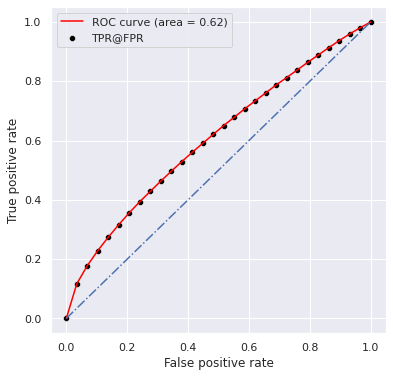

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(tpr_dataframe["False positive rate"],
         tpr_dataframe["True positive rate"],
         color='red', linestyle='-')
sns.scatterplot(data=tpr_dataframe,
                x="False positive rate",
                y="True positive rate",
                palette='orange', color='black')
plt.legend(['ROC curve (area = 0.62)', 'TPR@FPR'])
plt.plot(fpr_list, fpr_list, linestyle='-.')
plt.show()

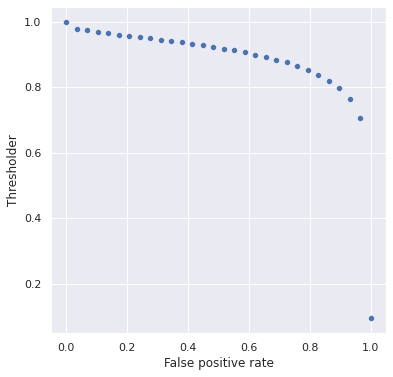

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=tpr_dataframe, x="False positive rate", y="Thresholder")
plt.show()